# 06 - Séries Temporais

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- Revisão Séries Temporais
- Series Estacionarias e Não Estacionárias
- Transformações de Séries
- Teste de Dickey Fuller

<img src="https://miro.medium.com/max/364/1*46jxiV9PiL5omTI9FDoW3Q.png" width=600>

## 

## Exercícios

### Questão 1

Utilizando o _dataset_ `covid_saopaulo.csv`, plote o gráfico do número de casos de COVID em SP e a média móvel dos últimos 15 dias.

### Resolução:

Vamos carregar as bibliotecas mais utilizadas:

In [2]:
# Import das Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carrega os dados de COVID em SP
covidsp = pd.read_csv('covid_saopaulo.csv', index_col=0, parse_dates=True)

In [4]:
# Identifica o index como uma variação diaria
covidsp.index = covidsp.index.to_period("D")

In [5]:
# Mostra os dados sobre a COVID
covidsp

,confirmed,deaths
date,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0
2020-03-01,0,0
...,...,...
2020-12-26,1253,13
2020-12-27,2836,55
2020-12-28,1576,39


In [6]:
# Calcula a média móvel para uma janela de 15 dias
covidsp['confirmed_MA'] = covidsp['confirmed'].rolling(window=15).mean()

In [7]:
# Mostra os dados
covidsp

,confirmed,deaths,confirmed_MA
date,,,
2020-02-26,0,0,NaN
2020-02-27,0,0,NaN
2020-02-28,1,0,NaN
2020-02-29,0,0,NaN
2020-03-01,0,0,NaN
...,...,...,...
2020-12-26,1253,13,7131.266667
2020-12-27,2836,55,6734.266667
2020-12-28,1576,39,6265.933333


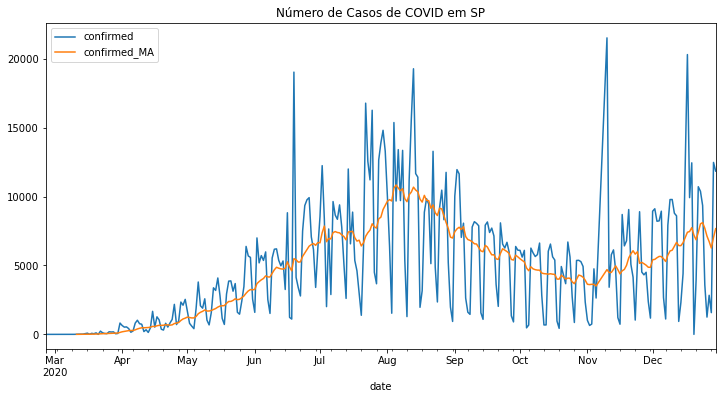

In [19]:
# Define o tamanho da janela de plot
plt.rcParams['figure.figsize'] = [12,6]

# Cria os gráficos de linha
covidsp[['confirmed', 'confirmed_MA']].plot()

# Cria um Titulo
plt.title('Número de Casos Diários de COVID em SP')

# Mostra o Gráfico
plt.show()

## 

### Questão 2

Ainda utilizando o _dataset_ `covid_saopaulo.csv`, agora para os casos de óbitos por COVID em SP, define as componentes da série temporal (sazonalidade, tendência, resíduo).

### Resolução:

Recapitulando as definições iniciais até para o desenvolvimento do exercício:

In [11]:
# Import das Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Carrega os dados de COVID em SP
covidsp = pd.read_csv('covid_saopaulo.csv', index_col=0, parse_dates=True)

In [13]:
# Identifica o index como uma variação diaria
covidsp.index = covidsp.index.to_period("D")

In [14]:
# Mostra os dados sobre a COVID
covidsp

,confirmed,deaths
date,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0
2020-03-01,0,0
...,...,...
2020-12-26,1253,13
2020-12-27,2836,55
2020-12-28,1576,39


Para decompormos a série temporal, iremos utilizar a função `seasonal_decompose` do _statsmodels_:

In [17]:
# Import do seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

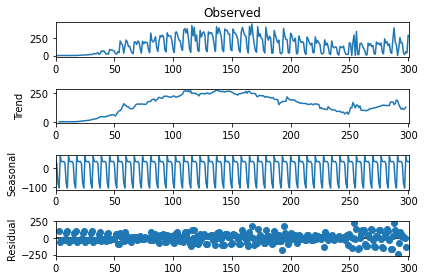

In [18]:
# Define o número de óbitos em um array
mortes = np.array(covidsp['deaths'])

# Calcula as componentes
result = seasonal_decompose(mortes, 
                            model='additive', # define o tipo de sazonalidade additive ou multiplicative
                            period=7)         # Define o periodo da ST que é semanal

# Cria os gráficos para as componentes
result.plot()

# Mostra os gráficos
plt.show()

## 

### Questão 3

Plote o gráfico da série temporal e defina as componentes para o _dataset_ `airline_passengers.csv`, dado que para o caso deste _dataset_ temos como período mensal e sazonalidade multiplicativa.

### Resolução:

In [20]:
# Import das principais libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Carrega o dataset de passageiros
passageiros = pd.read_csv('airline_passengers.csv', 
                          index_col=0,
                          parse_dates=True)

In [22]:
# Define o periodo de variação como mensal
passageiros.index = passageiros.index.to_period("M")

In [23]:
# Mostra as primeiras linhas do dataset
passageiros.head()

,Milhares de passageiros
Mês,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


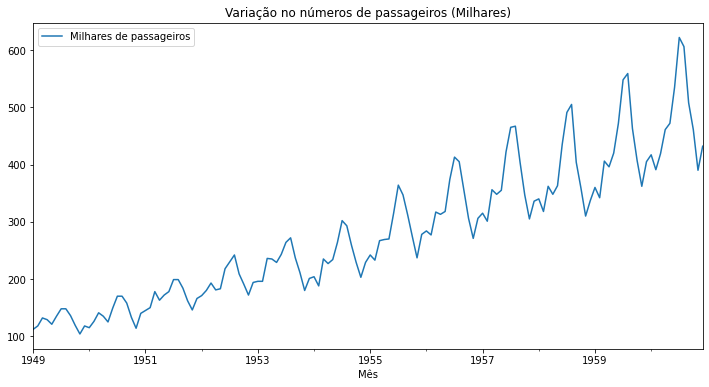

In [24]:
# Define o gráfico
passageiros.plot(figsize=(12,6))

# Cria um titulo para o gráfico
plt.title("Variação no números de passageiros (Milhares)")

# Mostra o gráfico
plt.show()

In [25]:
# Import do seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

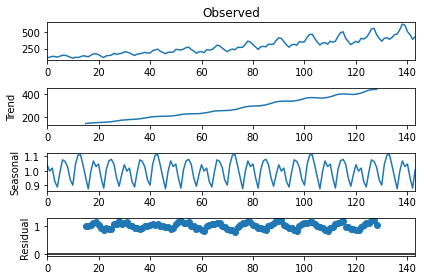

In [26]:
# Define o número de óbitos em um array
passengers = np.array(passageiros)

# Calcula as componentes
result = seasonal_decompose(passengers, 
                            model='multiplicative', # define o tipo de sazonalidade additive ou multiplicative
                            period=30)         # Define o periodo da ST que é semanal

# Cria os gráficos para as componentes
result.plot()

# Mostra os gráficos
plt.show()

## 

### Questão 4

Ao estudar séries temporais, um fator importante para utilizar modelos preditivos é a questão de estacionaridade de uma série.

Para uma série ser estacionária, ela precisa que sua média e variância mantenham-se constante ao longo do tempo. Para o _dataset_ `airline_passengers.csv` não é estacionária devido a sua característica de sazonalidade multiplicativa (ou seja, ao longo do tempo aumenta a amplitude da série, dessa forma a variância não é constante).

Uma forma de suavizar a série temporal para que tenha um comportamento estacionário é pegarmos a diferença de variação entre os pontos. Assim vamos praticar da seguinte forma:

__A)__ Calcule a primeira diferença para os dados do _dataset_ `airlines.csv` e plote um gráfico. Podemos dizer que pode ter um comportamento estacionário?

__B)__ Faça o mesmo procedimento para a segunda diferença.

### Resolução:

Recapitulando a preparação dos dados do exercício anterior:

In [27]:
# Import das principais libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Carrega o dataset de passageiros
passageiros = pd.read_csv('airline_passengers.csv', 
                          index_col=0,
                          parse_dates=True)

In [29]:
# Define o periodo de variação como mensal
passageiros.index = passageiros.index.to_period("M")

In [30]:
# Mostra as primeiras linhas do dataset
passageiros.head()

,Milhares de passageiros
Mês,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


__A)__ Calcule a primeira diferença para os dados do _dataset_ `airlines.csv` e plote um gráfico. Podemos dizer que pode ter um comportamento estacionário?

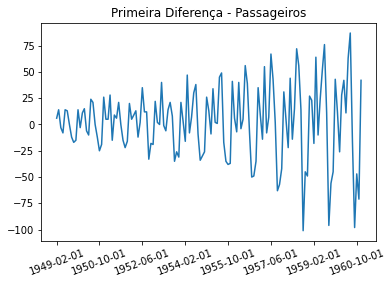

In [31]:
# Calculo da primeira diferença
y = np.diff(passageiros['Milhares de passageiros'])

# Definição de um novo array para o x (como pegamos a diferença, vai ter um elemento a menos)
x = passageiros.index[1:].to_timestamp()

# Define o gráfico
plt.plot(x,y)

# Cria um titulo
plt.title("Primeira Diferença - Passageiros")

# Define os limites do gráfico para o x
plt.xticks(np.arange(x.min(),x.max(), 20, dtype='datetime64[M]'),rotation=20)

# mostra o gráfico
plt.show()

No caso da primeira diferença, diminuiu o efeito da sazonalidade multiplicativa mas ainda sim, é visível que a série não é estacionária.

__B)__ Faça o mesmo procedimento para a segunda diferença.

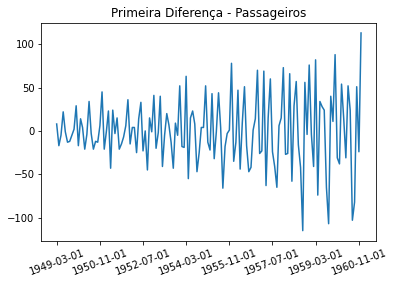

In [32]:
# Calculo da segunda diferença
y2 = np.diff(y)

# Definição de um novo array para o x (como pegamos a segunda diferença, vai ter dois elementos a menos)
x2 = passageiros.index[2:].to_timestamp()

# Define o gráfico
plt.plot(x2,y2)

# Cria um titulo
plt.title("Primeira Diferença - Passageiros")

# Define os limites do gráfico para o x
plt.xticks(np.arange(x2.min(),x2.max(), 20, dtype='datetime64[M]'),rotation=20)

# mostra o gráfico
plt.show()

Para a segunda diferença, diminuiu um pouco mais o efeito e podemos notar trechos que se comportam como estacionários (no caso de 1949 a 1954).

Nesse trecho poderíamos garantir que a série tenha um comportamento estacionário, mas para a série completa isso não pode ser afirmado.

## 

### Questão 5

Plote o gráfico do fechamento das ações do _Starbucks_ disponível no _dataset_ `starbucks.csv` e um gráfico de taxa de retorno das ações.

### Resolução:

In [37]:
# Import das libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Carrega o dataset
starbucks = pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)

In [39]:
# Define o periodo de variação como diario
starbucks.index = starbucks.index.to_period("D")

In [40]:
# Mostra as primeiras linhas do dataset
starbucks.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


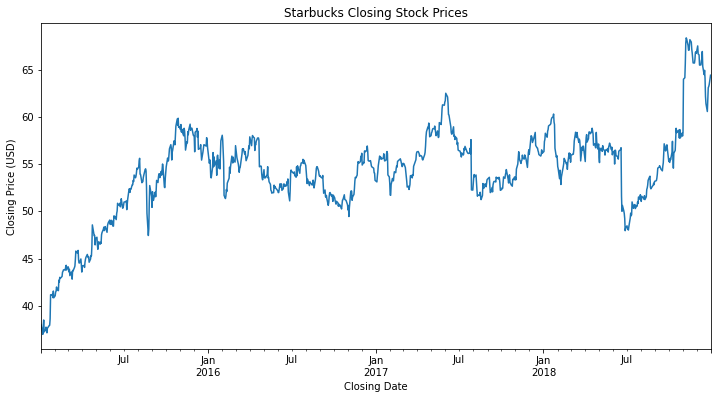

In [41]:
# Define os labels do gráfico como título e legenda dos eixos
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

# Cria o gráfico
starbucks['Close'].plot(figsize=(12,6),title=title)

# Cria o nome do eixo X
plt.xlabel(xlabel)

# Cria o nome do eixo Y
plt.ylabel(ylabel)

# Mostra o gráfico
plt.show()

<AxesSubplot:title={'center':'Taxa de retorno'}, xlabel='Date'>

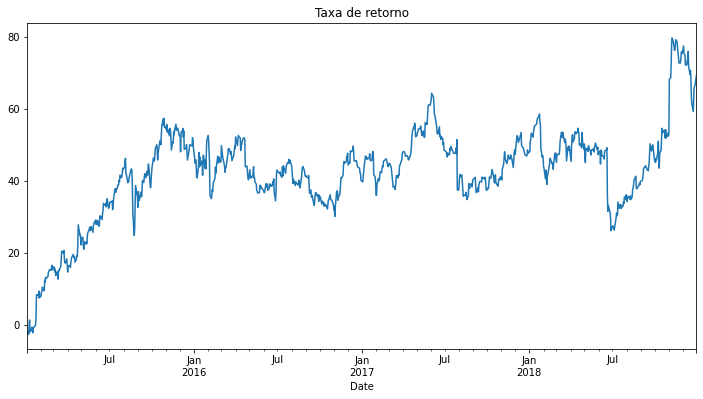

In [44]:
# taxa de retorno
(((starbucks['Close'].pct_change() + 1).cumprod() - 1)*100).plot(figsize=(12,6),title='Taxa de retorno')

# mostra o gráfico
plt.show()